$Assignment 1$\
$190639B$ - B.D.S. Udayantha


Question 1


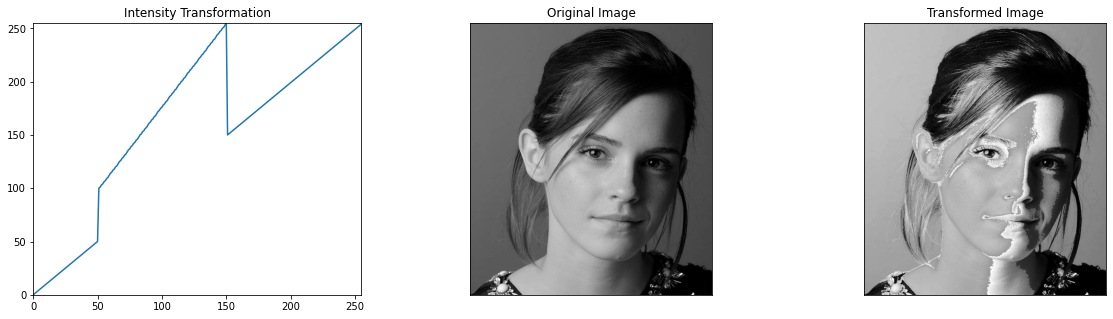

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
%matplotlib inline
emma_img=cv.imread(r"emma_gray.jpg",cv.IMREAD_GRAYSCALE)
assert emma_img is not None
t1=np.linspace(0,50,51).astype(np.uint8)
t2=np.linspace(100,255,100).astype(np.uint8)
t3=np.linspace(150,255,105).astype(np.uint8)
t=np.concatenate((t1,t2,t3),axis=0)
assert len(t)==256
new_emma_img=cv.LUT(emma_img,t)
fig,ax=plt.subplots(1,3,figsize=(20,5))
ax[0].plot(t)
ax[0].set_title("Intensity Transformation")
ax[0].set_xlim(0,255),ax[0].set_ylim(0,255)
ax[1].imshow(emma_img,cmap='gray',vmin=0,vmax=255)
ax[1].set_xticks([]),ax[1].set_yticks([])
ax[1].set_title("Original Image")
ax[2].imshow(new_emma_img,cmap='gray',vmin=0,vmax=256)
ax[2].set_xticks([]),ax[2].set_yticks([])
ax[2].set_title("Transformed Image")
plt.show()

In this question we keep the intensities of pixels as it is from 0-50 and 150- 255.But we change the original pixel values from 51-149 and the result is shwon in right most image. That is why in the result figure it has a light background and gray color effect on the left side of the face

Question 2(a)

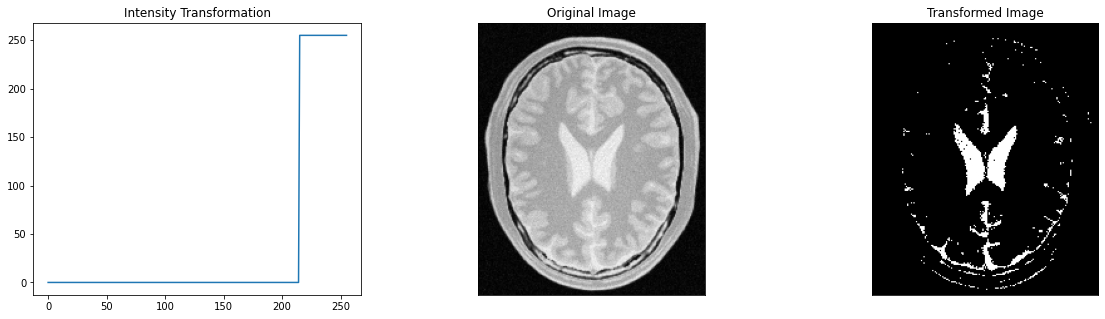

In [30]:
brain_img=cv.imread(r'brain_proton_density_slice.png',cv.IMREAD_GRAYSCALE)
assert brain_img is not None
t1=np.array([0 for r in range(0,215)])
t2=np.array([255 for r in range(215,256)])
t=np.concatenate((t1,t2),axis=0)
assert len(t)==256
fig,ax=plt.subplots(1,3,figsize=(20,5))
ax[0].plot(t)
ax[0].set_title("Intensity Transformation")
new_brain_img=cv.LUT(brain_img,t)
ax[1].imshow(brain_img,cmap='gray',vmin=0,vmax=255)
ax[1].set_xticks([]),ax[1].set_yticks([])
ax[1].set_title("Original Image")
ax[2].imshow(new_brain_img,cmap='gray',vmin=0,vmax=256)
ax[2].set_xticks([]),ax[2].set_yticks([])
ax[2].set_title("Transformed Image")
plt.show()

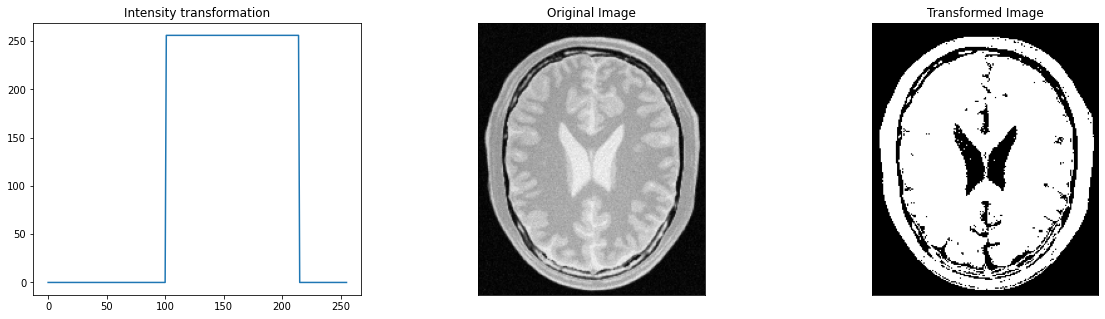

In [31]:
#2(b)
t1=np.array([0 for r in range(0,101)])
t2=np.array([256 for r in range(101,215)])
t3=np.array([0 for r in range(215,256)])
t=np.concatenate((t1,t2,t3),axis=0)
assert len(t)==256
fig,ax=plt.subplots(1,3,figsize=(20,5))
ax[0].plot(t)
ax[0].set_title("Intensity transformation")
new_brain_img=cv.LUT(brain_img,t)
ax[1].imshow(brain_img,cmap='gray',vmin=0,vmax=255)
ax[1].set_xticks([]),ax[1].set_yticks([])
ax[1].set_title("Original Image")
ax[2].imshow(new_brain_img,cmap='gray',vmin=0,vmax=256)
ax[2].set_xticks([]),ax[2].set_yticks([])
ax[2].set_title("Transformed Image")
plt.show()

In 2(a) and 2(b) white matter and gray matter is clearly shown in the right most figures in pure white color.Although pure white color has 255 intensity it is relevent to use a range to define white and gray colour in the original pictures as our naked eyes detect thse two ranges as white and gray respectively

Question 3(a)

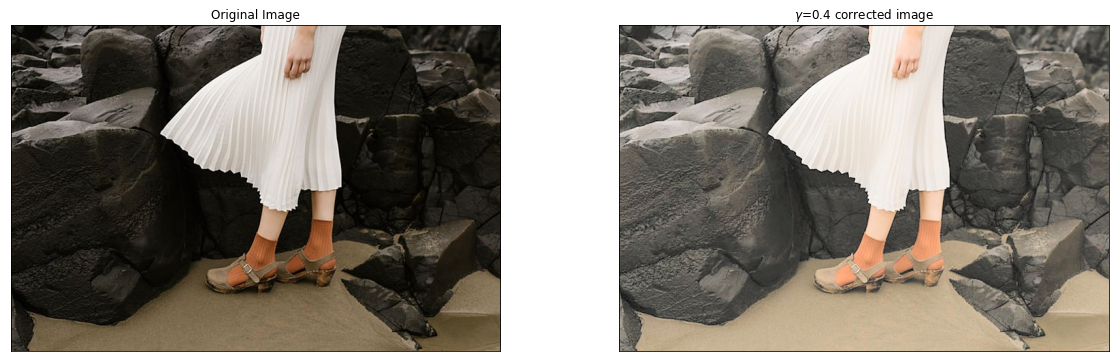

In [74]:
#gamma value is 0.4
gamma_img=cv.imread(r'highlights_and_shadows.jpg',cv.IMREAD_COLOR)
assert gamma_img is not None
LAB_img=cv.cvtColor(gamma_img,cv.COLOR_BGR2LAB)
gamma=0.4
t=np.array([(p/255)**gamma*255 for p in range(0,256)]).astype(np.uint8)
assert len(t)==256
L,A,B=cv.split(LAB_img)
new_L=cv.LUT(L,t)
new_gamma_img=cv.merge((new_L,A,B))
fig,ax=plt.subplots(1,2,figsize=(20,6))
ax[0].imshow(cv.cvtColor(gamma_img,cv.COLOR_BGR2RGB))
ax[0].set_xticks([]),ax[0].set_yticks([])
ax[0].set_title("Original Image")
ax[1].imshow(cv.cvtColor(new_gamma_img,cv.COLOR_Lab2RGB))
ax[1].set_xticks([]),ax[1].set_yticks([])
ax[1].set_title("${\gamma}$=0.4 corrected image")
plt.show()

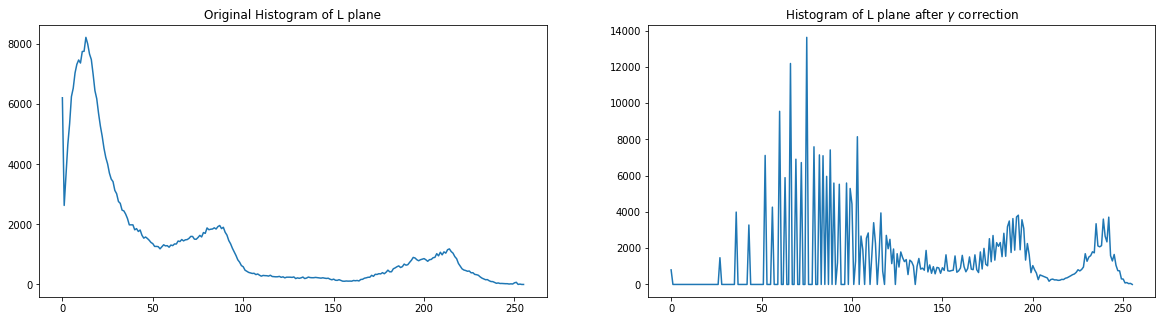

In [77]:
# 3(b)
hist_gamma_img=cv.calcHist([gamma_img],[0],None,[256],[0,255])
hist_new_gamma=cv.calcHist([new_gamma_img],[0],None,[256],[0,255])
fig,ax=plt.subplots(1,2,figsize=(20,5))
ax[0].plot(hist_gamma_img)
ax[0].set_title("Original Histogram of L plane")
ax[1].plot(hist_new_gamma)
ax[1].set_title("Histogram of L plane after ${\gamma}$ correction")
plt.show()

In question(3) I use 0.4 as the gamma value. It quite obvious that the original picture is dark and we can't see the details well. After aplying gamma correction to the L plane we can see many details of the image. when we compare the histograms it is very clear that adrk colors dominate the original picture while gray and light colors dominate in the ${\gamma}$ corrected image

Question 4

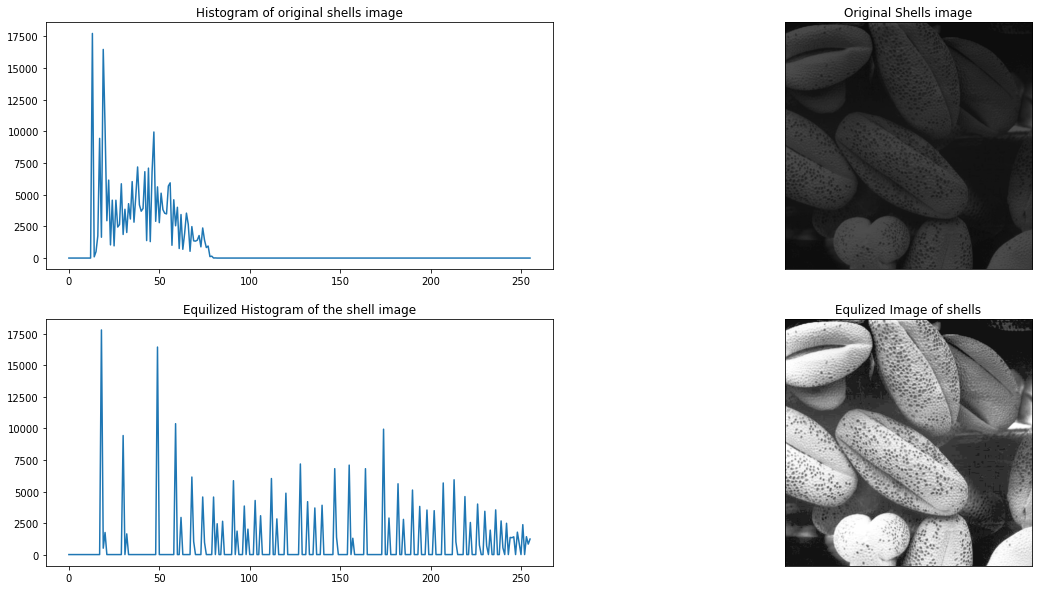

In [9]:
def plot_histograms(image):
    shell_img=cv.imread(image,cv.IMREAD_GRAYSCALE)
    assert shell_img is not None
    arrayOfNumberOfResalutionPoints=np.zeros((1,256))
    for r in range(0,256):
        arrayOfNumberOfResalutionPoints[0][r]=np.count_nonzero(shell_img==r)
    fig,axes=plt.subplots(2,2,figsize=(20,10))
    number_of_rows,number_of_coloumns=shell_img.shape
    axes[0][0].plot(arrayOfNumberOfResalutionPoints[0])
    axes[0][0].set_title("Histogram of original shells image")
    axes[0][1].imshow(shell_img,cmap='gray',vmin=0,vmax=255)
    axes[0][1].set_title("Original Shells image")
    axes[0][1].set_xticks([]),axes[0][1].set_yticks([])
    equilized_values_of_histogram=np.zeros((1,256))
    for r in range(0,256):
        s=(255/(number_of_coloumns*number_of_rows))*np.sum(arrayOfNumberOfResalutionPoints[:,:r+1])
        equilized_values_of_histogram[0][r]=round(s)
    new_hist_equilized_img=cv.LUT(shell_img,equilized_values_of_histogram)
    arrayOfNumberOfResalutionPoints_ofNewEquilizedImg=np.zeros((1,256))
    for r in range(0,256):
        arrayOfNumberOfResalutionPoints_ofNewEquilizedImg[0][r]=np.count_nonzero(new_hist_equilized_img==r)
    axes[1][0].plot(arrayOfNumberOfResalutionPoints_ofNewEquilizedImg[0])
    axes[1][0].set_title("Equilized Histogram of the shell image")
    axes[1][1].imshow(new_hist_equilized_img,cmap='gray',vmin=0,vmax=255)
    axes[1][1].set_title("Equlized Image of shells")
    axes[1][1].set_xticks([]),axes[1][1].set_yticks([])
    plt.show()
plot_histograms('shells.png')

In the question 4 I've defined a funtion plot_histograms(image) to calculate the equilized histogram and plot both original and equilized hitograms and images.
In the equilized histogram we can see that there is nearly flat spectrum compared to the original signal. Thats why we can see an enhaced more detailed image as the equilized image

Question 5 (a)

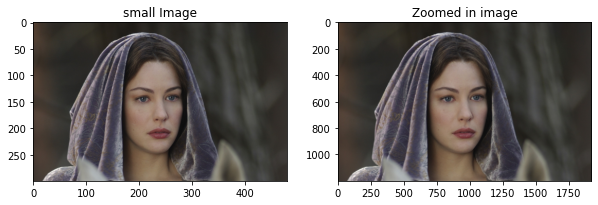

averaged ssd= 16.792970920138888


In [44]:
def nearestNeighbourZoom(image,scale):
    newImageRows=int(image.shape[0]*scale)
    newImagecolumns=int(image.shape[1]*scale)
    newImage=np.zeros((3,newImagecolumns,newImageRows),dtype=np.float32)
    for j in range(newImageRows):
        for i in range(newImagecolumns):
            i_old=np.round(i/scale)
            j_old=np.round(j/scale)
            if i_old==image.shape[1]:
                i_old-=1
            if j_old==image.shape[0]:
                j_old-=1
            newImage[:,i,j]=image[int(j_old),int(i_old),:]
    return newImage.astype(np.uint8)
image1=cv.imread(r'D:\4th sem uom\machine vision\Assignment\a1q5images\a1q5images\im02small.png',cv.IMREAD_COLOR)
image2=cv.imread(r'D:\4th sem uom\machine vision\Assignment\a1q5images\a1q5images\im02.png',cv.IMREAD_COLOR)
new_img=nearestNeighbourZoom(image1,4)
fig,axes=plt.subplots(1,2,figsize=(10,5))
axes[0].imshow(cv.cvtColor(image1,cv.COLOR_BGR2RGB))
axes[0].set_title("small Image")
axes[1].imshow(cv.cvtColor(new_img.T,cv.COLOR_BGR2RGB))
axes[1].set_title("Zoomed in image")
plt.show()
diff=(image2-new_img.T)**2
print('averaged ssd=',np.sum(diff)/(new_img.shape[0]*new_img.shape[1]*new_img.shape[2]))

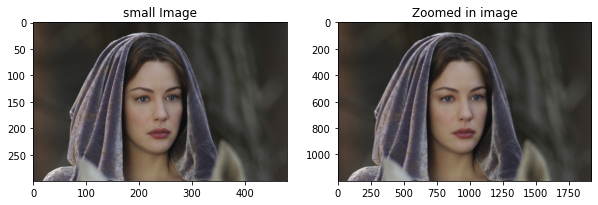

averaged ssd= 16.21177662037037


In [48]:
# 5(b)
def BilinearZoom(image,scale):
    import math as m
    newImageRows=int(image.shape[0]*scale)
    newImagecolumns=int(image.shape[1]*scale)
    newImage=np.zeros((3,newImagecolumns,newImageRows),dtype=np.float32)
    for j in range(newImageRows):
        for i in range(newImagecolumns):
            i_old=i/scale
            j_old=j/scale
            lu_cx,lu_cy=m.floor(i_old),m.floor(j_old)
            ru_cx,ru_cy=m.ceil(i_old),m.floor(j_old)
            lb_cx,lb_cy=m.floor(i_old),m.ceil(j_old)
            rb_cx,rb_cy=m.ceil(i_old),m.ceil(j_old)
            if ru_cx==image.shape[1]:ru_cx=lu_cx
            if rb_cx==image.shape[1]:rb_cx=lb_cx
            if rb_cy==image.shape[0]:rb_cy=ru_cy
            if lb_cy==image.shape[0]:lb_cy=ru_cy
            p1=image[lu_cy,lu_cx,:]
            p2=image[ru_cy,ru_cx,:]
            p3=image[rb_cy,rb_cx,:]
            p4=image[lb_cy,lb_cx,:]
            p11=p1*(ru_cx-i_old)+p2*(i_old-lu_cx)
            p12=p4*(ru_cx-i_old)+p3*(i_old-lu_cx)
            if ru_cx==lu_cx:
                p11=p1
                p12=p4
            p13=p11*(rb_cy-j_old)+p12*(j_old-ru_cy)
            if rb_cy==ru_cy:p13=p11
            newImage[:,i,j]=p13.astype(np.uint8)
    return newImage.astype(np.uint8)
image1=cv.imread(r'D:\4th sem uom\machine vision\Assignment\a1q5images\a1q5images\im02small.png',cv.IMREAD_COLOR)
image2=cv.imread(r'D:\4th sem uom\machine vision\Assignment\a1q5images\a1q5images\im02.png',cv.IMREAD_COLOR)
new_img=BilinearZoom(image1,4)
fig,axes=plt.subplots(1,2,figsize=(10,5))
axes[0].imshow(cv.cvtColor(image1,cv.COLOR_BGR2RGB))
axes[0].set_title("small Image")
axes[1].imshow(cv.cvtColor(new_img.T,cv.COLOR_BGR2RGB))
axes[1].set_title("Zoomed in image")
plt.show()
diff=(image2-new_img.T)**2
print('averaged ssd=',np.sum(diff)/(new_img.shape[0]*new_img.shape[1]*new_img.shape[2]))

In the question 5 (a) and (b) I have defined two funtion for nearest neighbor zooming and Bilinear zooming respectively. In each function I go through all the defined pixels in new_Image and given image for zooming. then calculte the required pixel values according to these two different methods. biliear Interpolation is better compared to the other moethod
 
Question 6(a)

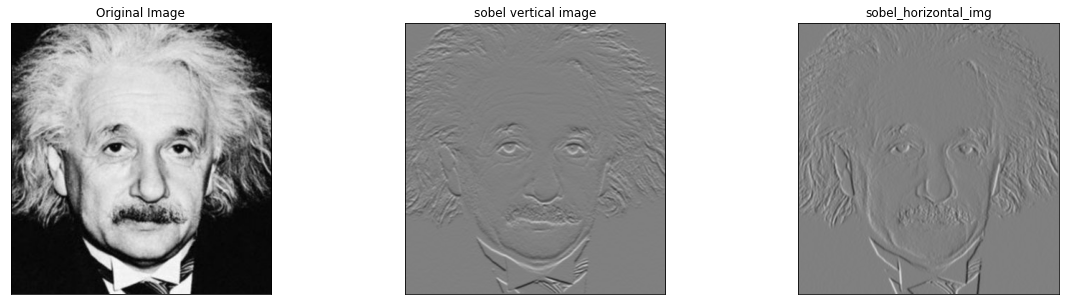

In [54]:
einsteine_img=cv.imread(r'einstein.png',cv.IMREAD_GRAYSCALE).astype(np.float32)
assert einsteine_img is not None
vertical_kernel=np.array([[-1,-2,-1],[0,0,0],[1,2,1]],dtype=np.float32)
horizontal_kernel=np.array([[-1,0,1],[-2,0,2],[-1,0,1]],dtype=np.float32)
sobel_vertical_img=cv.filter2D(einsteine_img,-1,vertical_kernel)
sobel_horizontal_img=cv.filter2D(einsteine_img,-1,horizontal_kernel)
fig,axes=plt.subplots(1,3,figsize=(20,5))
axes[0].imshow(einsteine_img,cmap='gray')
axes[0].set_xticks([]),axes[0].set_yticks([])
axes[0].set_title('Original Image')
axes[1].imshow(sobel_vertical_img,cmap='gray',vmin=-1020,vmax=1020)
axes[1].set_xticks([]),axes[1].set_yticks([])
axes[1].set_title('sobel vertical image')
axes[2].imshow(sobel_horizontal_img,cmap='gray',vmin=-1020,vmax=1020)
axes[2].set_xticks([]),axes[2].set_yticks([])
axes[2].set_title('sobel_horizontal_img')
plt.show()

In the sobel vertical filtered image we can see the horizontal lines of the image and in the soble horizontal image we can clearly see the vertical lines of the image

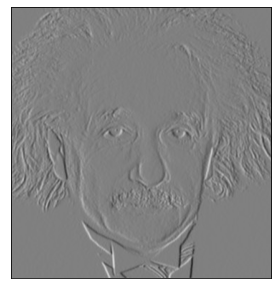

In [13]:
#part b
def sobel_filter(Image,kernel):
    y_len_of_kernel,x_len_of_kernel=kernel.shape
    assert x_len_of_kernel%2==1 and y_len_of_kernel%2==1
    midx_ofKernel,midy_ofKernel=x_len_of_kernel//2,y_len_of_kernel//2
    padding1,padding2=midx_ofKernel,midy_ofKernel
    padded_img= np.zeros((Image.shape[0] + padding1*2, Image.shape[1] + padding2*2))
    padded_img[int(padding1):int(-1 * padding1), int(padding2):int(-1 * padding2)] = Image
    resulted_img=np.zeros(Image.shape,dtype=np.float32)
    for x in range(Image.shape[1]):
        for y in range(Image.shape[0]):
            resulted_img[y,x]=(kernel*padded_img[y:y+y_len_of_kernel,x:x+x_len_of_kernel]).sum()
    return resulted_img
new_kernel=np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
img=sobel_filter(einsteine_img,np.flipud(np.fliplr(new_kernel)))
fig,ax=plt.subplots(figsize=(5,5))
ax.imshow(img,cmap='gray',vmin=-1020,vmax=1020)
ax.set_xticks([]),ax.set_yticks([])
plt.show()

Question 7 (a)

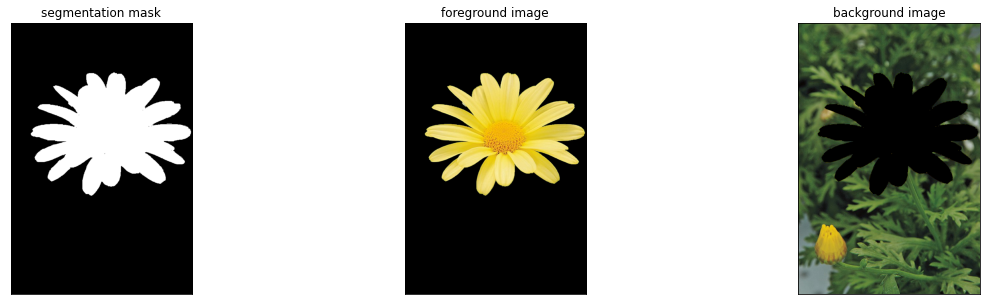

In [14]:
image = cv.imread(r'daisy.jpg',cv.IMREAD_COLOR)
mask = np.zeros(image.shape[:2], np.uint8)
bgModel = np.zeros((1, 65), np.float64)
fgModel = np.zeros((1, 65), np.float64)
rectangle = (25,125,530,450)
(mask,bgModel,fgModel)=cv.grabCut(image, mask, rectangle,bgModel, fgModel,3, cv.GC_INIT_WITH_RECT)
outputMask = np.where((mask == cv.GC_BGD) | (mask == cv.GC_PR_BGD),0, 1)
outputMask = (outputMask * 255).astype("uint8")
output = cv.bitwise_and(image, image, mask=outputMask)
backImage=image-output
fig,axes=plt.subplots(1,3,figsize=(20,5))
axes[0].imshow(cv.cvtColor(outputMask,cv.COLOR_BGR2RGB))
axes[0].set_xticks([]),axes[0].set_yticks([])
axes[0].set_title('segmentation mask')
axes[1].imshow(cv.cvtColor(output,cv.COLOR_BGR2RGB))
axes[1].set_xticks([]),axes[1].set_yticks([])
axes[1].set_title('foreground image')
axes[2].imshow(cv.cvtColor(backImage,cv.COLOR_BGR2RGB))
axes[2].set_xticks([]),axes[2].set_yticks([])
axes[2].set_title('background image')
plt.show()

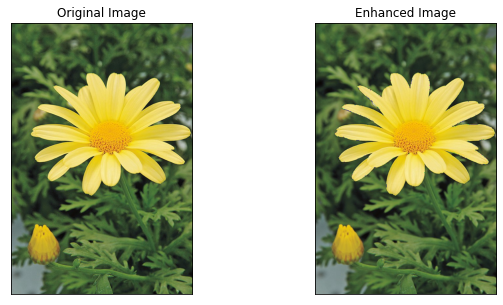

In [55]:
kernel_size=3
sigma=3
blurred_back=cv.GaussianBlur(backImage,(kernel_size,kernel_size),sigma)
enhanced_img=output+blurred_back
fig,axes=plt.subplots(1,2,figsize=(10,5))
cv.imshow('Image',enhanced_img)
cv.waitKey(0)
cv.destroyAllWindows()
axes[0].imshow(cv.cvtColor(image,cv.COLOR_BGR2RGB))
axes[0].set_xticks([]),axes[0].set_yticks([])
axes[0].set_title('Original Image')
axes[1].imshow(cv.cvtColor(enhanced_img,cv.COLOR_BGR2RGB))
axes[1].set_xticks([]),axes[1].set_yticks([])
axes[1].set_title('Enhanced Image')
plt.show()